In [114]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128

Populating the interactive namespace from numpy and matplotlib


In [115]:
# Potential functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal

def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs 

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy

In [116]:


def simulate(q, goal, obstacles, num_steps=200, delta_time=1.9):
    fmax = .5
    X, Y = np.meshgrid(np.arange(-10, 10, .5), np.arange(-10, 10, .5))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)
    
    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
   
    fig, ax= plt.subplots(figsize=(10,10))
    ax.quiver(X,Y,Fx,Fy,F_m,color='b')

    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis([-10,10,-10,10])
    ax.set_aspect('equal')
    
    
    trajectory = []
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    
    return np.array(trajectory)

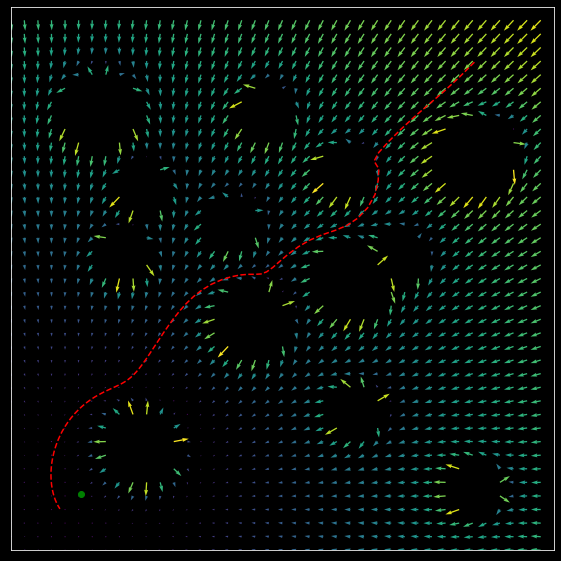

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import copy as C

# creating goal and robot position
goal = [-7.425, -7.925, 0.02]
r_pos = np.array((7.625, 8.55))
r_log = [C.copy(r_pos)]

#creating obstacles
obstacles = [[2.725, -0.00000027,0.3],
        [2.525, .2, 0.3],
        [2.925, -0.19999, 0.3],
        [7.425, 4.725, 0.3],
        [7.225, 4.725, 0.3],
        [7.625, 4.725, 0.3],
        [-1.025, -1.5, 0.3],
        [-1.225, -1.5, 0.3],
        [-0.825, -1.5, 0.3],
        [-6.7,6.4, 0.3],
        [-6.9,6.4, 0.3],
        [-6.5,6.4, 0.3],
        [-5.15, -6.2, .3],
        [-4.95, -6.4, 0.3],
        [-5.35, -6., 0.3],
        [-1.775, 2.1, 0.3],
        [-5.8, 0.975, 0.3],
        [7.275, -7.75, 0.3],
        [2.425, 4.075, 0.3],
        [4.4, 0.875, 0.3],
        [2.825, -4.85, 0.3],
        [-0.525, 6.3, 0.3],
        [-5.125, 3.425, 0.3],]



trajectory = simulate(r_pos, goal, obstacles)
plot(trajectory[:,0], trajectory[:,1], 'r--')
plot(goal[0], goal[1], 'go')
#plot_vector_field()

TypeError: object of type 'module' has no len()

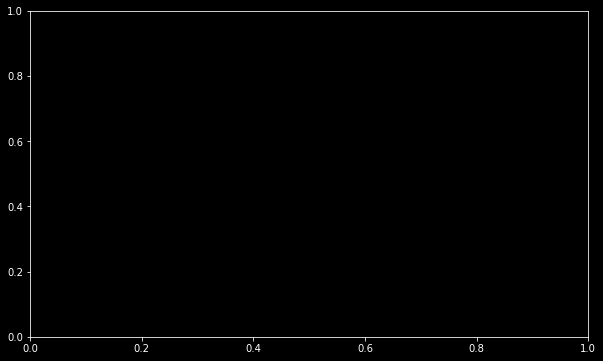

In [112]:
import matplotlib.pyplot as plt
from matplotlib import animation
#from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plt.plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plt.plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())